# Medical Appointment Data Analysis.

### Objectives of Analysis

A patient makes a doctor's appointment, receives all necessary instructions, and does not show up. What factors are to blame for this?
We will analyze reasons why some patients do not show up for his medical appointment and whether there are reasons for that using the data we have in this notebook.
We will try to find some correlation between the different attributes we have and whether the patient shows up or not. The dataset we are going to use contains 110527 medical appointment records and its 14 associated variables (`PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap', SMS_received, No-show`). Among these variables, there are 13 independent variables  and one dependent variable which is  `No-show`.

### Questions to be answered:
- What is the percentage of no-show?
- What important factors will enable us predict if a patient will show up for their scheduled appointment?
    - Is the gender of the patient related to whether a patient will show or not?
    - Are patients with scholarships more likely to miss their appointments?
    - Are patients who don't recieve sms more likely to miss their appointment?
    - Is the time difference between the scheduling and appointment related to whether a patient will show?
    - Does age affect whether a patient will show up or not?
    - What is the percentage of patients missing their appointments for every neighbourhood?

### Setup

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#make sure plots and images are showing and inline with the notebook
%matplotlib inline

### Data Wrangling

#### Loading of dataset and checking the columns in it

In [2]:
#Loading dataset into a dataframe and checking the columns
df = pd.read_csv('medappointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Get the shape of the dataframe and the datatypes of each column 
print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
...,...
Diabetes,int64
Alcoholism,int64
Handcap,int64
SMS_received,int64


In [4]:
# Descriptive statistics of the numeric datatypes
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Descriptive statistics of the non-numeric datatypes

df.describe(include=['O'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [6]:
# Check for any missing values in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
# check for duplicate rows in the dataset
df.duplicated().any()

False

### Notes on Data Exploration

From the results of our analysis, there are some columns that need to have their datatype corrected; ScheduledDay and AppointmentDay which have to be of datatype date. Another finding is that the data doesn't have any duplicated or missing values, which is good. The column no-show can be a bit confusing and we can invert the values to make it more intuitive (show instead of no-show) and we can also turn it to an integer value instead of yes or no.
From the descriptive statistics of the numeric data, it showed that the minimum age of patients in the dataset was -1 year. This could be a newly born or yet to be born baby. The mean age of the patients was approximately 37 years and a maximum age of 115 years.
Descriptive statistics of the non-numeric data showed that the highest gender representation in our data were females with a frequency of 71840. Most patients were from the JARDIM CAMBURI neighborhood with a frequency of 7717. For the no-show column of the data the 

### Data Cleaning
The following steps are going to be taken to clean the data and make it suitable to answer the objectives of our analysis.
   - Drop irrelevant columns
   - Modify column names
   - Correct datatypes
   - Invert the `no-show` column to `show` with integer values
   - Correct misspelled column names
   - Create a new column to store the days difference between scheduling day and appointment day
 

#### Step 1: Dropping irrelevant columns

In [8]:
#Drop the id columns of the datasets
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Step 2: Changing all column names to lower-case and replacing all `-` with `_`

In [9]:
df.columns = df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
...,...
7,diabetes
8,alcoholism
9,handcap
10,sms_received


#### Step 3: Changing the datatype of scheduledday and appointmentday columns from object to datetime

In [10]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hipertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handcap         110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


#### Step 4: Inverting the no-show column to show with integer values

In [11]:
# renaming no_show column to show
# Mapping the boolen values `No` and `Yes` to integer values 1 and 0 repectively

print(df.no_show.unique())
df.no_show = df.no_show.map({'No':1,
                            'Yes':0})
df.rename(columns = {'no_show':'show'}, inplace = True)
print(df.show.unique())
df.head()

['No' 'Yes']
[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#### Step 5: Correcting the spelling of `handcap` column name to `handicap` 

In [12]:
# renaming 'handcap' column name to 'handicap'
df.rename(columns = {'handcap':'handicap'}, inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#### Step 6: Creating a new column to store the days difference scheduled day and appointment day

In [13]:
day_diff = (df.appointmentday.dt.date - df.scheduledday.dt.date).dt.days
df.insert(3, 'day_diff', day_diff)
df.day_diff.dtype

dtype('int64')

In [14]:
# Check datatypes
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
show                            int64
dtype: object

### Notes on Date Cleaning

With all the steps taken to get the data cleaned completed, and also creating a new time difference column, we can start analyzing our data and try to find the correlation between the different variables.

### Exploratory Data Analysis

In [15]:
# define a function to get the ratio of show in different categories

def plot_ratio(x):
    df.groupby(x).show.mean().plot(kind = 'bar',
                                  edgecolor = 'black',
                                  figsize = (8,7))#.set_ylabel('Ratio of Show')
    display(df.groupby(x).show.mean())

#### Question 1: What is the percentage of no-show?

In [16]:
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Percentage of patients who did not show up for their appointment is 20.193255946510803%
Percentage of patients showed up for their appointment is 79.8067440534892%


,show
show,
0,22319
1,88208


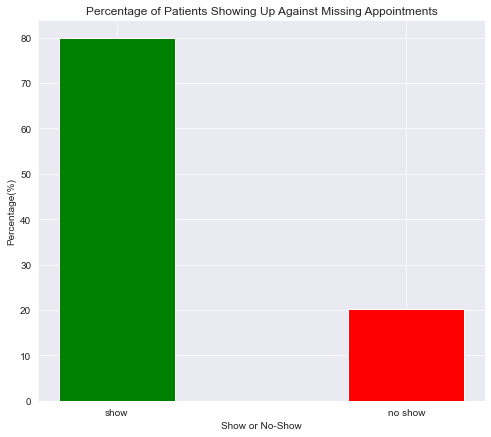

In [17]:
# Find the percentage of patients that showed up or did not show up for their appointment

print(f"Percentage of patients who did not show up for their appointment is { (1-df.show.mean())*100 }%")
print(f"Percentage of patients showed up for their appointment is { (df.show.mean())*100 }%")
# no-show appointments
no_show = len(df[df.show==0])/len(df.show)
# show appointments
show = len(df[df.show==1])/len(df.show)
# Getting the total counts of shows and no shows
total_count = df.groupby('show')[['show']].count()

# Lets plot this result to visualize the data
plt.figure(figsize = (8,7))
plt.bar(['show','no show'],[show*100, no_show*100], width = 0.4, color = ['g','r']);
plt.title('Percentage of Patients Showing Up Against Missing Appointments')
plt.ylabel('Percentage(%)')
plt.xlabel('Show or No-Show')

display(total_count)

#### Question 2: What important factors will enable us predict if a patient will show up for their scheduled appointment?

In [18]:
# Lets create filters for show and no show parameters
show = (df.show == 1)
no_show = (df.show == 0)
total_miss = len(df[no_show])
total = len(df)

#### Question 2a: Is the gender of the patient related to whether a patient will show or not?

,gender
F,13.204013
M,6.989242


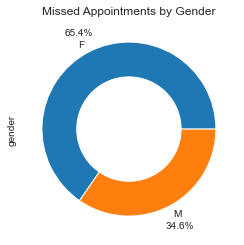

In [19]:
%%capture --no-display
# Lets get the number of patients who missed their appointments and group them by their gender

no_show_gender = df[no_show]['gender'].value_counts()

# Lets plot this using a doughnut chart
explode = (0.1, 0)
no_show_gender.plot(kind='pie', pctdistance=1.25, autopct='%1.1f%%')
circle = plt.Circle( (0,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Missed Appointments by Gender')

#Lets get the percentage of patients who missed appointments by gender
print('Percentage of females and males who missed appointments by gender: ')
pd.DataFrame((no_show_gender)*100 / total)

Text(0, 0.5, 'Number of Patients')

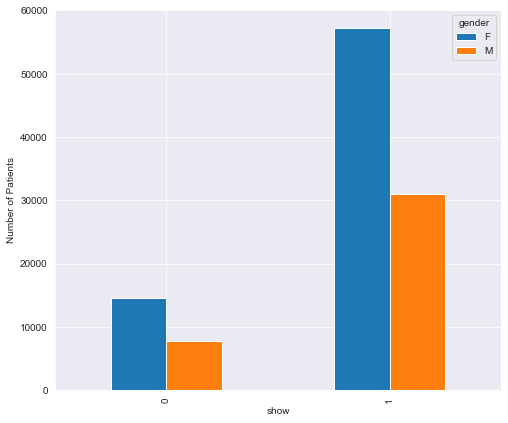

In [20]:
# Lets find out how many males and females who either showed up(show) or didn't show up(no show) for their appointment
show_no_show = df.groupby(['gender','show']).size().unstack('gender')

#Lets visualize output of the above result in a stacked bar plot
show_no_show.plot(kind = 'bar', figsize = (8,7)).set_ylabel('Number of Patients')

#### Finding

From the analysis,females miss appointments the most with a percentage of 65.4% which is almost double the percentage of males. This result is backed by the exploratory analysis of our data, which showed that females had the highest gender representation among the patients with a frequency of 71840.

#### Question 2b: Are patients with scholarships more likely to miss their appointments?

The scholarship system is a social program that is run by the Brazilian government to provide financial aid to poor families. This included health care for families through either direct or conditional cash transfers and it also worked to give free education to children who couldn't afford to go to school, to show the importance of education. In order to be eligible, families had to ensure that children attend school and get vaccinated.

scholarship
0    0.801928
1    0.762637
Name: show, dtype: float64

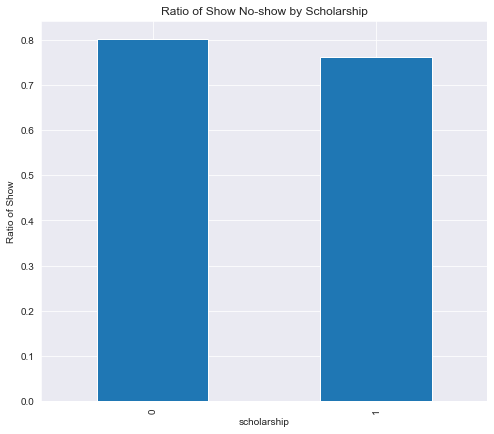

In [21]:
# Lets get the percentage of patients on scholarships who missed their appointments
scholarship = df.groupby(['scholarship']).show.mean()
scholarship.plot(kind = 'bar', figsize = (8,7)).set_ylabel('Ratio of Show')
plt.title('Ratio of Show No-show by Scholarship');
display(df.groupby(['scholarship']).show.mean())

#### Finding

From the analysis of the effect of scholarship on whether patients show or don't show up for their appointment show that patients who are not on scholarships are more likely to miss their appointments as compared to patients on scholarship. This can be attributed to the affordability of health care for patients and families who are not on the scholarship program.

#### Question 2c: Are patients who don't receive SMS(s) more likely to miss their appointment?

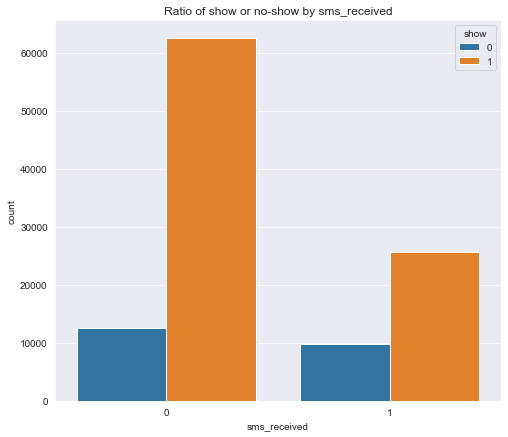

In [22]:
# Determining the percentage of patients who showed or didn't show for their appointment based on SMS(s) received
df.groupby('sms_received').show.value_counts(normalize=True)
plt.figure(figsize = (8,7))
sns.countplot(x=df['sms_received'], hue=df['show'])
plt.title('Ratio of show or no-show by sms_received');

#### Finding

The findings form this analysis is very interesting. First of all, patients who did not receive sms showed up the most for their appointments as compared to patients who received an sms. From the visualization, we could see that among those who did not receive sms, the number of patients who showed up for their appointments were higher as compared to the same category of patients who received sms which was very low. The same can also be said for patients who did not show up for their appointments for in both instances.
The blue bar indicates that patients `did not show up` and the orange bar indicates that patients `showed`.

#### Question 2d: Is the time difference between the scheduling day and appointment day related to whether a patient will show or not?

In the day_diff column of the dataset, negative days were recorded as the difference between the scheduling day and the actual appointment day. We have to filter out the positive days so we can carry out this analysis.

In [23]:
# filtering out only the positive day differences
df_diff = df[df['day_diff']>0]
df_diff.day_diff.unique()

array([  2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,  28,
        24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,  46,
        39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,  84,
        78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,  49,
        73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,   8,
         5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,  77,
        69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,  86,
        98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90, 151,
       126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101, 105,
        92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123], dtype=int64)

The values for the day difference ranges from 1 to 179, which is very wide. Plotting this range will not communicate the insight we want for the analysis. In the steps below, we will create bins to segment and sort data values of the day difference column.

The number of patients from each day interval category who missed their appointments:


,day_diff1
more_than_5,5974
within_5_days,5462
more_than 20,3375
more_than_1Mon,2829
more_than_14,2286
more_than_2Mon,596
same_day,0


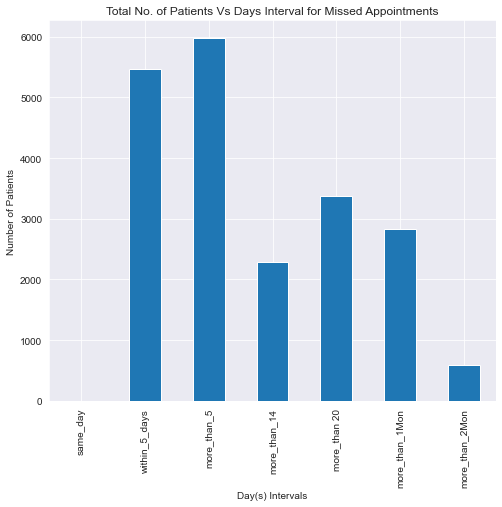

In [24]:
# Turning day_diff values into a categorical column called day_diff1
# The categorical column will take on a limited, and fixed number of possible values 
# which will be stored in a list called 'labels'in for our day_diff column

bin_edges = [-1, 0, 5, 14, 20, 30, 60, 179]
labels = ['same_day','within_5_days', 'more_than_5', 'more_than_14', 'more_than 20', 'more_than_1Mon', 'more_than_2Mon']
df['day_diff1'] = pd.cut(df_diff.day_diff, bin_edges, labels = labels)

# Filter out the no show records and calculate the total count for each categorized day interval
no_show_day_diff = df[no_show].day_diff1.value_counts()
plt.figure(figsize = (8,7))
no_show_day_diff.reindex(labels).plot(kind = 'bar')
plt.title('Total No. of Patients Vs Days Interval for Missed Appointments')
plt.xlabel('Day(s) Intervals')
plt.ylabel('Number of Patients')

# Calculating the number of patients of each day_diff category who missed their appointments
no_show_day_diff = df[no_show].day_diff1.value_counts()
print('The number of patients from each day interval category who missed their appointments:')
pd.DataFrame(no_show_day_diff)

#### Finding

From the analysis, it appears no patient showed up for their appointments on the same day of scheduling. A total of __5974__ patients missed their appointments after more than 5 days of scheduling an appointment. This was followed by those who missed their appointments within 5 days of scheduling their appointments, with a total patient count of __5462__. Patients who missed their appointments after more than a month of scheduling were __2829__, followed by __2286__ patients who missed after more than 14 days of scheduling. __596__ patients missed their appointments after more than 2 months of scheduling their appointment.

The number of patients from each day interval category who showed up for their appointments:


,day_diff1
within_5_days,17780
more_than_5,14994
more_than 20,6983
more_than_1Mon,5454
more_than_14,4727
more_than_2Mon,1499
same_day,0


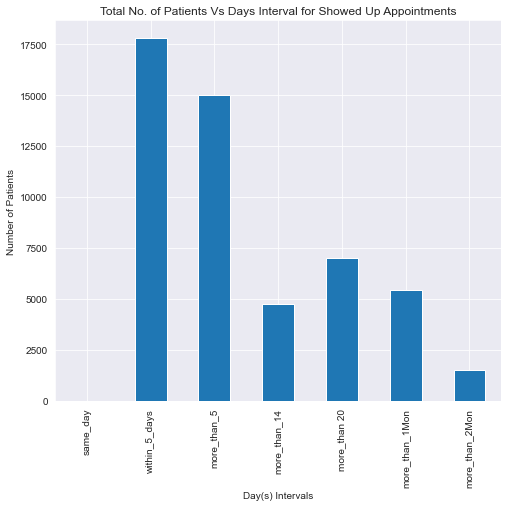

In [25]:
# Filter out the show records and calculate the total count for each categorized day interval
show_day_diff = df[show].day_diff1.value_counts()
plt.figure(figsize = (8,7))
show_day_diff.reindex(labels).plot(kind = 'bar')
plt.title('Total No. of Patients Vs Days Interval for Showed Up Appointments')
plt.xlabel('Day(s) Intervals')
plt.ylabel('Number of Patients')

# Calculating the number of patients of each day interval category who showed up for their appointments
show_day_diff = df[show].day_diff1.value_counts()
print('The number of patients from each day interval category who showed up for their appointments:')
pd.DataFrame(show_day_diff)

#### Finding

For the number of patients who showed up for their appointments after scheduling, same_day schedluing and appointments had no patient showing up. This was similar or same as the previous analysis for those who missed appointments on the same day of scheduling.
A total of __17780__ patients showed up for their appointments within 5 days of scheduling a medical appointment. This was followed by __14994__ patients who showed up for their appointments after more than 5 days of scheduling their medical appointment. The number of patients that showed up for their appointments dropped to __4727__ after more than 14 days of scheduling an appointment. Then after more than 20 days, the number of patients that show up for their appointments rise to __6983__ and the number falls to __5454__ after one month of an appointment been scheduled. After more than 2 months the number of patients who showed up for their scheduled appointments was __1499__.

#### Question 2e: Does the age of a patient have an influence on whether the patient will show or not show for an appointment?

In [26]:
# Lets take a look at the descriptive statistics of the age column
# to see the minimum and maximum age values

df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

From the descriptive statistics above, the minimum age of patients was -1 and the maximum age was 115.
For the purpose of this specific analysis on age of patient and appointment, all ages less than zero was dropped so there only positive values.

In [27]:
# Deleting the negative age value
# Lets find the row that holds this value

df_neg_age = df[df['age'] == -1]
df_neg_age

,gender,scheduledday,appointmentday,day_diff,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,day_diff1
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,0,-1,ROMÃO,0,0,0,0,0,0,1,NaN


In [28]:
# Dropping the row of the negative age value

df.drop(df[df['age'] == -1].index, inplace = True)

In [29]:
# lets run a descriptive statistics on the age column to verify

df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

We are going to use a histogram to visualize the effect the ages of the patients have on either showing or not showing up for their appointment. The histogram informs us on two things:
1. The age distribution of the patients
2. Which age group or range showed or did not show up for their appointment

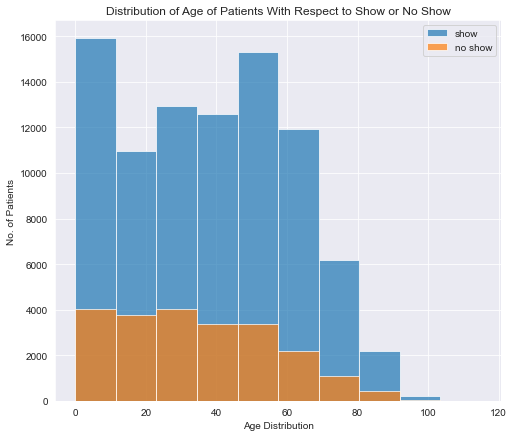

In [30]:
%%capture --no-display

# Plot of histogram showing the age of patients who showed or did not show for thier appointments
age_show = df[show]['age']
age_no_show = df[no_show]['age'];

plt.figure(figsize = (8,7))
age_show.hist(alpha = 0.7, label = 'show');
age_no_show.hist(alpha = 0.7, label = 'no show');
plt.title('Distribution of Age of Patients With Respect to Show or No Show')
plt.xlabel('Age Distribution')
plt.ylabel('No. of Patients')
plt.legend()

#### Finding

The distribution of the age of patients with respect to show or no show, indicate a youthful patient population as the distribution is positive or right skewed. Meaning the bulk of the patient population are between the ages of 0 to about 55 years old. 
More youthful patients with ages from 0 to about 37 years are more likely to miss an appointment. Senior or older patients from about 90 to 115 years always show up for their appointments although they have the least count in the patient population.
It also shows that although patients of a youthful age are likely to miss, they are also the ones more likely to show up for their appointments. This observation was also same for patients between the ages of about 50 to 60 years old.

#### Question 2f: What is the percentage of patients who missed their appointments and patients who showed up for their appointments for every neighbourhood?

In [31]:
# Get the number of times each neighborhood was recorded or appeared in the dataset
df_neigh = df['neighbourhood'].value_counts()
df_neigh

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [32]:
%%capture --no-display

# the number of patients who missed their appointments for each neighbourhood
neigh_no_show = df[no_show].neighbourhood.value_counts()
pd.DataFrame(neigh_no_show.sort_values(axis = 0, ascending = False))

,neighbourhood
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703
...,...
PONTAL DE CAMBURI,12
ILHA DO BOI,3
ILHAS OCEÂNICAS DE TRINDADE,2
ILHA DO FRADE,2


In [33]:
total_neigh_miss = neigh_no_show.sum()

Text(0, 0.5, 'No. of Patients')

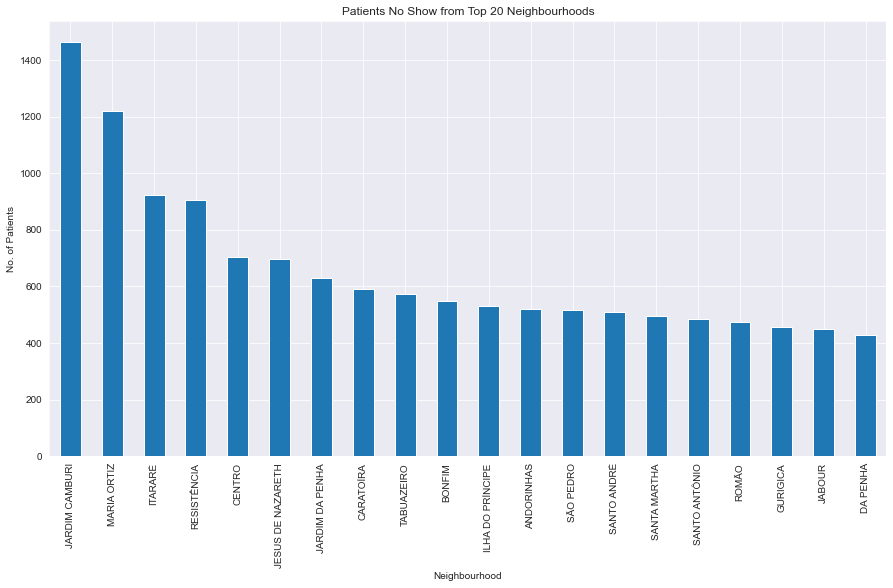

In [34]:
plt.figure(figsize = (15,8))
neigh_no_show.sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.title('Patients No Show from Top 20 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('No. of Patients')

In [35]:
# Percentage of patients who missed the appointments(no show) for each neighbourhood
neigh_no_show_perc = (neigh_no_show / df_neigh) * 100
pd.DataFrame(neigh_no_show_perc.sort_values(axis = 0, ascending = False))

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,100.000000
SANTOS DUMONT,28.918495
SANTA CECÍLIA,27.455357
SANTA CLARA,26.482213
ITARARÉ,26.266363
...,...
SOLON BORGES,14.712154
MÁRIO CYPRESTE,14.555256
AEROPORTO,12.500000
ILHA DO BOI,8.571429


#### Finding

From the above analysis, patients from a total of 81 neighbourhoods were recorded. From this, it was observed that the Jardim Camburi neighbourhood had the highest frequency. Appearing __7717__ times in the data.
For patients who didn't show up for their medical appointments, patients from the Jardim Camburi neighbourhood recorded the highest number of no shows, with a total of __1465__. Three neighbourhoods that had the least appearances in the dataset, also had the least number of patients not showing up for their appointments. These neighbourhoods were:
- Ilha Do Boi: Frequency of appearance was __35__ and had only __3__ patients from the neighbourhood not showing for their appointment.
- Ilha Do Frade: Frequency of appearance was __10__ and had only __2__ patients from the neighbourhood not showing for their appointment.
- Ilha Oceanicas De Trindade: Frequency of appearance was __1__ and had only __2__ patients from the neighbourhood not showing for their appointment.

The percentage of patients who missed their medical appointments from each neighbourhood informs us if out of the total number of patients from a given neighborhood, either all or only a portion missed their appointments.
For pateints from the Ilha Oceanicas De Trindade neighbourhood, all of them missed their 'scheduled medical appointments recording a percentage of __100%__

In [50]:
%%capture --no-display

# the number of patients who showed up for their appointments for each neighbourhood
neigh_show = df[show].neighbourhood.value_counts()
pd.DataFrame(neigh_show.sort_values(axis = 0, ascending = False))

,neighbourhood
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635
...,...
PONTAL DE CAMBURI,57
ILHA DO BOI,32
ILHA DO FRADE,8
AEROPORTO,7


Text(0, 0.5, 'No. of Patients')

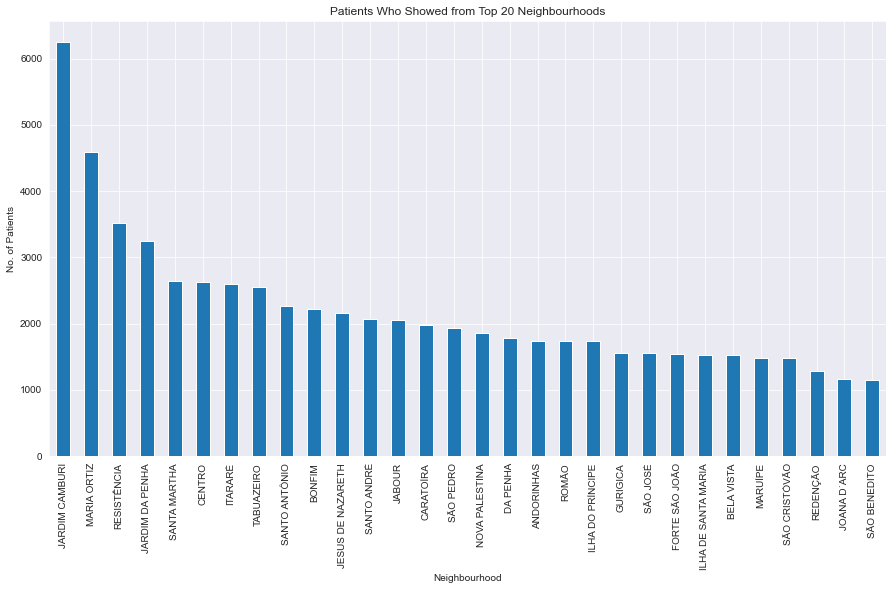

In [52]:
plt.figure(figsize = (15,8))
neigh_show.sort_values(ascending = False).head(30).plot(kind = 'bar')
plt.title('Patients Who Showed from Top 20 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('No. of Patients')

In [53]:
# Percentage of patients who showed up for their appointments for each neighbourhood
neigh_show_perc = (neigh_show / df_neigh) * 100
pd.DataFrame(neigh_show_perc.sort_values(axis = 0, ascending = False))

,neighbourhood
PARQUE INDUSTRIAL,100.000000
ILHA DO BOI,91.428571
AEROPORTO,87.500000
MÁRIO CYPRESTE,85.444744
SOLON BORGES,85.287846
...,...
ITARARÉ,73.733637
SANTA CLARA,73.517787
SANTA CECÍLIA,72.544643
SANTOS DUMONT,71.081505


#### Finding

For the analysis on the patients who showed up for their scheduled medical appointments with respect to each neighbourhood, patients from the Jardim Camburi neighbourhood recorded the highest number. A total of __6252__ patients from this neighbourhood was recorded as the number that showed up for their scheduled medical appointments. The neighbourhood that had the least number of patients showing up for their medical appointments was Parque Industrial with only __1__ patient.
The percentage of patients who showed up for their medical appointments from each neighbourhood informs us if out of the total number of patients from a given neighborhood, either all or only a portion showed up for their appointments.
For the Parque Industrial neighbourhood, the only patient that scheduled medical appointment showed up recording a percentage of __100%__.
This is followed by the Ilha Do Boi neighbourhood that had __32__ patients scheduling an appointment. Out of this total number, approximately __91%__ showed up for their medical appointments. 


#### Conclusion

#### After analyzing the dataset here is a bulleted summary of the findings:

1.  Percentage of patients who didn't show up for their appointment is 20.19%.
2.  The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.
3.  It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.
4.  It seems that patients with scholarships are actually more likely to miss their appointment.
5.  A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
6.  There is no clear relation between the age and whether the patients show up or not but younger patients are more likely to miss their appointments.

#### Analysis Shortcoming & Data Limitations

*   The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
*   The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
*   The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
*   When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.